# Kunskapskontroll SQL 
## Lisa Påhlsson DS24

**TEORETISKA FRÅGOR**

**1. Beskriv kort hur en relationsdatabas fungerar**
- Relationsdatabas är en databas där informationen är organiserad i flera olika tabeller som kan kopplas samman. Detta gör att man kan samanställa information från olika tabeller, vilket underlättar datalagringen som blir mer effektiv och lättare att hantera än exempelvis en enda tabell med all information i.

**2. Vad menas med “CRUD”-flödet?**
- CRUD är en akronym för de grundläggande transaktionerna i SQL
    - Create - lägga till rader i en tabell
    - Read - läsa data ur en tabell
    - Update - uppdatera data i en tabell
    - Delete - ta bort rader i en tabell

**3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?** 
- Left join och inner join används för att få information från olika tabeller sammanställt i samma svar. För att göra detta använder man en gemensam kolumn som man kopplar samman.
    - Left Join: När man kombinerar två tabeller, man behåller all data från den vänstra tabellen (huvudtabellen) men bara det som matchar från den högra tabellen (den du kopplar ihop med).
    - Inner Join: Då är det bara den data som matchar i båda kolumnerna som behålls. Rader som inte matchar tas bort från resultatet.

**4. Beskriv kort vad indexering i SQL innebär**
- Kortfattat kan man se det som ett register. Genom att indexera rader kan systemet snabbare hitta datan som efterfrågas utan att behöva leta igenom alla data. Utan indexering blir sökandet långsammare då man måste söka igenom alla rader istället.

**5. Beskriv kort vad en vy i SQL är**
- En Vy (view) i SQL är kortfattat en sparad fråga (query), denna vy blir som en slags sparad tabell som man sedan använda för att göra nya sökningar. Dock lagrar en vy ingen data själv utan den visar resultatet av frågan när man anropar den.

**6. Beskriv kort vad en lagrad procedur i SQL är**
- En lagrad procedur är en samling SQL-frågor och logik som sparas i databasen och kan användas när som helst, som ett script. Detta är användbart för att automatisera och förenklara återkommande uppgifter. Det är också säkrare då slutanvändare inte kommer åt att ändra i databasen men ändå kommer åt informationen. 

**UPPGIFT 1**

In [227]:
import numpy as np
import pandas as pd
from scipy import stats
from sqlalchemy import create_engine , Table, inspect, text
import matplotlib.pyplot as plt
import seaborn as sns

# Funktion för att skapa och returnera en ny SQLAlchemy engine baserat på den givna dialekten, servern och databasen
def new_engine(dialect, server, database):
    eng = f'{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server'
    print(eng)
    return create_engine(eng)

# Funktion för att hämta och returnera en lista med dictionaries som innehåller information om alla scheman, tabeller och kolumner i databasen
def get_schemas_tables_and_columns(inspector):
    data = []
    for schema in inspector.get_schema_names():
        tables = inspector.get_table_names(schema=schema)
        for table in tables:
            columns = inspector.get_columns(table, schema=schema)
            for column in columns:
                data.append({
                    'Schema': schema,
                    'Table': table,
                    'Column': column['name'],
                    'Type': column['type']
                })
    return data

# Funktion för att beräkna konfidensintervallet för en given dataset och konfidensnivå.
def compute_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = data.mean()
    std = data.std()
    h = std / np.sqrt(n) * stats.t.ppf((1 + confidence) / 2., n - 1) if n > 1 else 0
    return mean, h

engine = new_engine('mssql', 'LISAS_DATOR', 'AdventureWorks2022')
inspector = inspect(engine)
schema = get_schemas_tables_and_columns(inspector) #för att få detaljerad info om tabeller och kolumner


mssql://LISAS_DATOR/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server


C:\Users\lisap\AppData\Local\Temp\ipykernel_10496\2907825797.py:20: SAWarning: Did not recognize type 'hierarchyid' of column 'OrganizationNode'
  columns = inspector.get_columns(table, schema=schema)
C:\Users\lisap\AppData\Local\Temp\ipykernel_10496\2907825797.py:20: SAWarning: Did not recognize type 'geography' of column 'SpatialLocation'
  columns = inspector.get_columns(table, schema=schema)
C:\Users\lisap\AppData\Local\Temp\ipykernel_10496\2907825797.py:20: SAWarning: Did not recognize type 'hierarchyid' of column 'DocumentNode'
  columns = inspector.get_columns(table, schema=schema)


Obs! Jag har sett varningarna ovan, har fått fram att jag kan ignorera dem men hade även kunnat lägga till type eller ignorera dem med hjälp av kod men har inte haft tid till det.

In [228]:
# här hämtar jag alla scheman, tabeller och kolumner i databasen och skapar en DataFrame för att visualisera det
schemas_tables_columns = get_schemas_tables_and_columns(inspector)

df_all = pd.DataFrame(schemas_tables_columns)
df_all.head(10).style.hide(axis='index')



Schema,Table,Column,Type
dbo,AWBuildVersion,SystemInformationID,TINYINT
dbo,AWBuildVersion,Database Version,"NVARCHAR(25) COLLATE ""SQL_Latin1_General_CP1_CI_AS"""
dbo,AWBuildVersion,VersionDate,DATETIME
dbo,AWBuildVersion,ModifiedDate,DATETIME
dbo,DatabaseLog,DatabaseLogID,INTEGER
dbo,DatabaseLog,PostTime,DATETIME
dbo,DatabaseLog,DatabaseUser,"NVARCHAR(128) COLLATE ""SQL_Latin1_General_CP1_CI_AS"""
dbo,DatabaseLog,Event,"NVARCHAR(128) COLLATE ""SQL_Latin1_General_CP1_CI_AS"""
dbo,DatabaseLog,Schema,"NVARCHAR(128) COLLATE ""SQL_Latin1_General_CP1_CI_AS"""
dbo,DatabaseLog,Object,"NVARCHAR(128) COLLATE ""SQL_Latin1_General_CP1_CI_AS"""


In [229]:
# Räknar totalt antal scheman, använder unique för att räkna unika värden annars räknas alla värden
total_schemas = len(df_all['Schema'].unique())
print(f"Totalt antal scheman: {total_schemas}")

# Räknar totalt antal unika tabeller
total_tables = len(df_all['Table'].unique())
print(f"Totalt antal tabeller: {total_tables}")

# Räknar totalt antal unika kolumner
total_columns = len(df_all['Column'].unique())
print(f"Totalt antal kolumner: {total_columns}")


Totalt antal scheman: 6
Totalt antal tabeller: 72
Totalt antal kolumner: 246


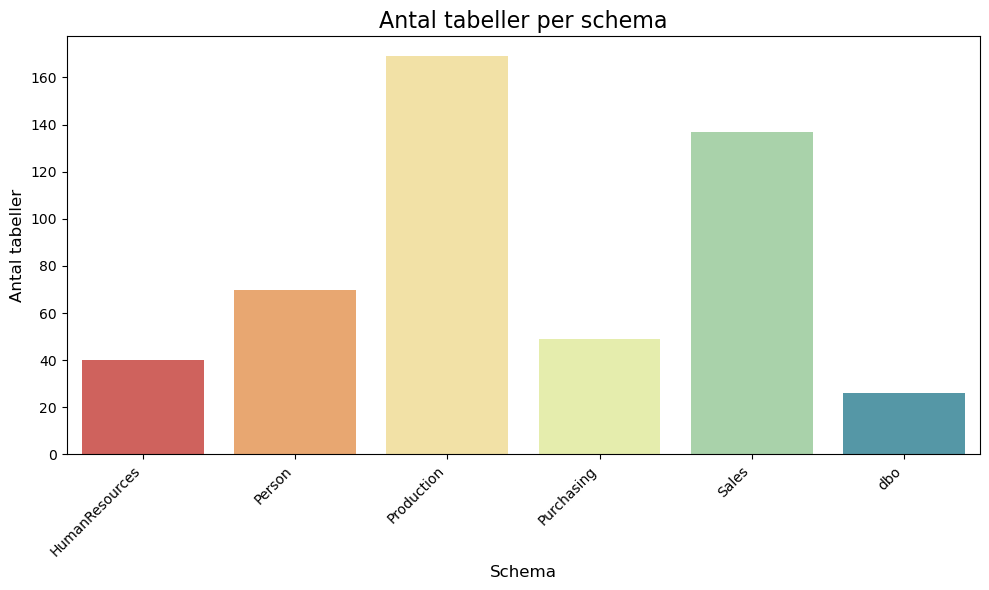

In [230]:
# Räknar antal tabeller per schema
table_counts = df_all.groupby('Schema').size().reset_index(name='Antal tabeller')

# Skapar en visualisering via seaborn och en barplot
plt.figure(figsize=(10, 6)) 
sns.barplot(
    data=table_counts, x='Schema', y='Antal tabeller', hue='Schema', dodge=False, palette='Spectral', legend=False)
plt.title('Antal tabeller per schema', fontsize=16)
plt.xlabel('Schema', fontsize=12)
plt.ylabel('Antal tabeller', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


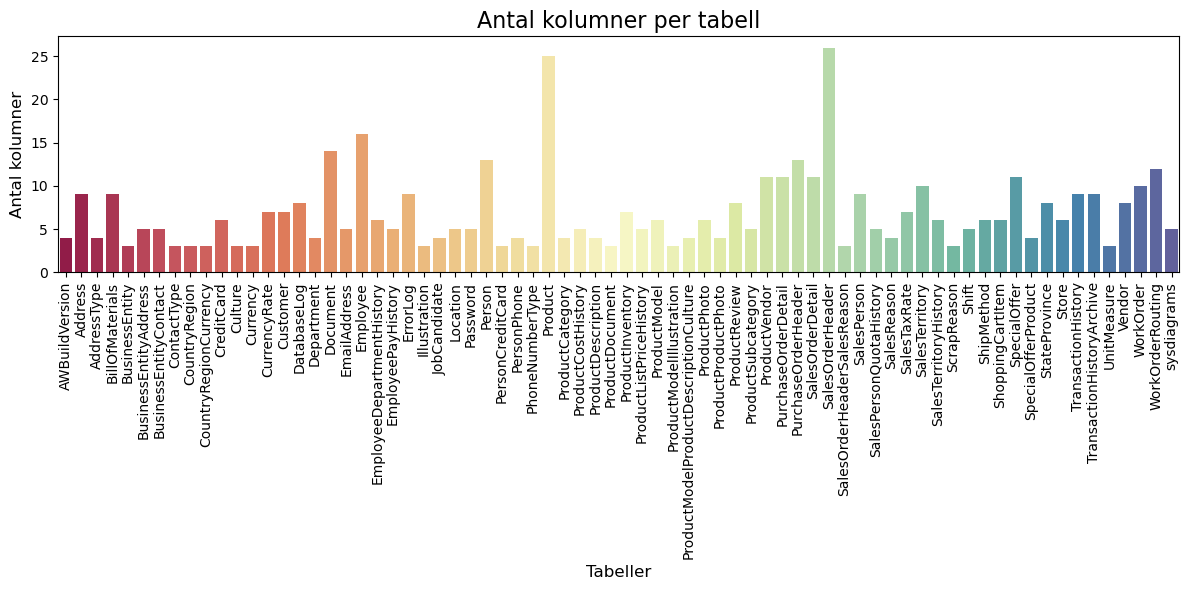

In [231]:
# Räknar antal antal kolumner per tabell
column_count = df_all.groupby('Table').size().reset_index(name='Antal Kolumner')

# Skapar en visualisering via seaborn och en barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Table', y='Antal Kolumner', data=column_count, hue='Table', dodge=False, palette='Spectral', legend=False)
plt.xticks(rotation=90, fontsize=10) 
plt.xlabel('Tabeller', fontsize=12)
plt.ylabel('Antal kolumner', fontsize=12)
plt.title('Antal kolumner per tabell', fontsize=16) 
plt.tight_layout()  
plt.show()


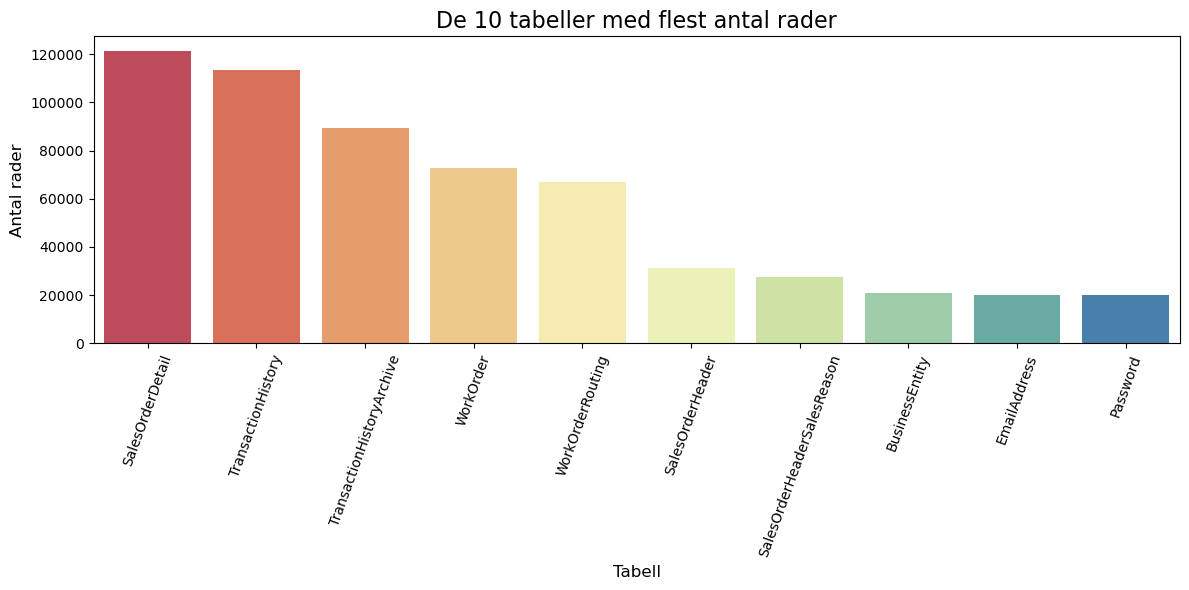

In [232]:
# En SQL-fråga för att räkna antal rader per tabell
sql_query_rows = ('''
SELECT 
    schemas.name AS SchemaName,
    tables.name AS TableName,
    SUM(partion.rows) AS RowCounts
FROM 
    sys.partitions partion
INNER JOIN 
    sys.tables tables ON partion.object_id = tables.object_id
INNER JOIN 
    sys.schemas schemas ON tables.schema_id = schemas.schema_id
WHERE 
    partion.index_id IN (0, 1)  -- 0 = Heap, 1 = Clustered index
GROUP BY 
    schemas.name, tables.name
ORDER BY 
    RowCounts DESC;
''')

# Hämtar antal rader per tabell från databasen
df_row_counts = pd.read_sql(sql_query_rows, engine)

# Visualiserar de 10 tabeller med flest antal rader i en barplot med Seaborn
plt.figure(figsize=(12, 6))
top_10_tables = df_row_counts.head(10).sort_values(by='RowCounts', ascending=False)
sns.barplot(
    x='TableName', y='RowCounts', data=top_10_tables, hue='TableName', dodge=False, palette='Spectral', legend=False)
plt.xticks(rotation=70, fontsize=10)
plt.xlabel('Tabell', fontsize=12)
plt.ylabel('Antal rader', fontsize=12)
plt.title('De 10 tabeller med flest antal rader', fontsize=16)
plt.tight_layout()
plt.show()


Efter en kontroll av scheman och tabeller ser man att AdventureWork2022 är en databas för ett förtag som säljer produkter. Det är tydligt att den största delen av databasen rör produktion och försäljning. De tabeller som innehåller allra mest data är SalesOrderDetail och TransactionHistory. Med anledning av detta valde jag att börja titta lite på denna för att bekanta mig med databasen.

In [233]:
# SQL-fråga för att räkna antal produkter i tabellen Production.Product
product_count_query = ("""
SELECT
    COUNT(ProductID) AS ProductCount
FROM
    Production.Product;
""")

df_product_count = pd.read_sql(product_count_query, engine)
product_count = df_product_count.at[0, 'ProductCount']

print(f"AdventureWorks tillverkar {product_count} olika produkter.")

AdventureWorks tillverkar 504 olika produkter.


In [234]:
# SQL-fråga för att räkna antal ordrar per månad
orders_monthly_sql = '''
SELECT 
    YEAR(OrderDate) AS Year,
    MONTH(OrderDate) AS Month,
    COUNT(DISTINCT SalesOrderID) AS TotalOrders
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate), MONTH(OrderDate)
ORDER BY Year DESC, Month DESC;
'''
# Hämtar antal ordrar per månad från databasen samt konverterar till en DataFrame och konverterar till datetime
orders_monthly_df = pd.read_sql(orders_monthly_sql, engine)
orders_monthly_df['Date'] = pd.to_datetime(orders_monthly_df[['Year', 'Month']].assign(DAY=1))

# Sortera DataFrame efter datum
orders_monthly_df = orders_monthly_df.sort_values('Date')

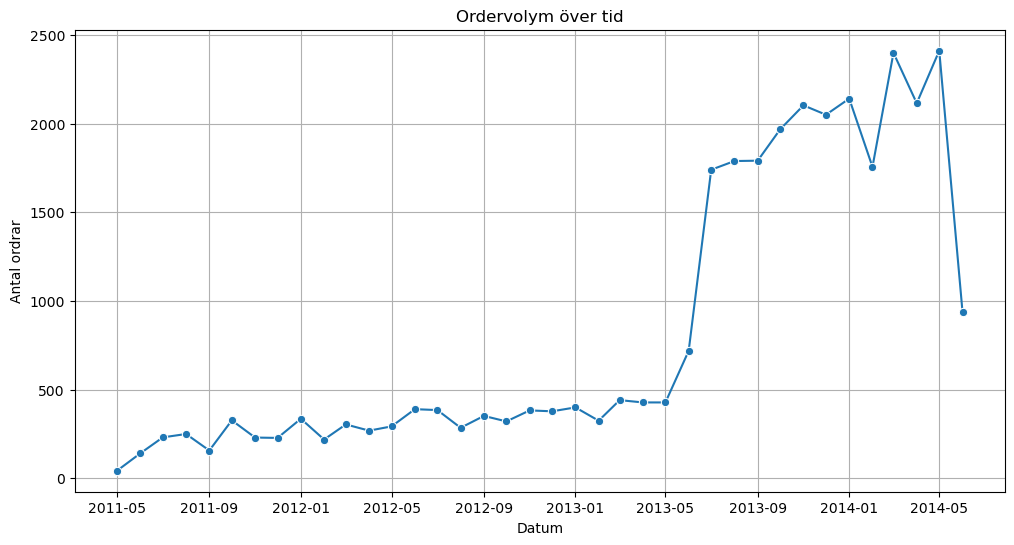

In [235]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_monthly_df, x='Date', y='TotalOrders', marker='o')
plt.title('Ordervolym över tid')
plt.xlabel('Datum')
plt.ylabel('Antal ordrar')
plt.grid(True)
plt.show()


Efter detta har jag tittat lite på olika ordrar och varor som säljs av företaget.

In [236]:
# Query för att hämta data från tabellen SalesOrderDetail för att använda i en visualisering
query_sales = """
SELECT 
    sales.SalesOrderID AS FörsäljningsOrderID,
    sales.ProductID AS ProduktID,
    product.Name AS ProduktNamn,
    subcategory.ProductSubcategoryID AS ProduktSubkategoriID,
    category.Name AS ProduktKategori,
    sales.OrderQty AS OrderAntal,
    sales.UnitPrice AS PrisPerEnhet,
    (sales.UnitPrice * sales.OrderQty) AS TotalFörsäljning
FROM Sales.SalesOrderDetail sales
JOIN Production.Product product ON sales.ProductID = product.ProductID
LEFT JOIN Production.ProductSubcategory subcategory ON product.ProductSubcategoryID = subcategory.ProductSubcategoryID
LEFT JOIN Production.ProductCategory category ON subcategory.ProductCategoryID = category.ProductCategoryID
ORDER BY TotalFörsäljning DESC;
"""

df_sales_order_detail = pd.read_sql(query_sales, engine)

# Visa de första raderna för säkerställning
df_sales_order_detail.head(10).style.hide(axis='index')

FörsäljningsOrderID,ProduktID,ProduktNamn,ProduktSubkategoriID,ProduktKategori,OrderAntal,PrisPerEnhet,TotalFörsäljning
55282,954,"Touring-1000 Yellow, 46",3,Bikes,26,1192.035000,30992.910000
43884,772,"Mountain-100 Silver, 42",1,Bikes,14,1971.994200,27607.918800
51131,969,"Touring-1000 Blue, 60",3,Bikes,21,1311.238500,27536.008500
53460,976,"Road-350-W Yellow, 48",2,Bikes,30,850.495000,25514.850000
43875,775,"Mountain-100 Black, 38",1,Bikes,13,1957.494200,25447.424600
57054,966,"Touring-1000 Blue, 46",3,Bikes,19,1311.238500,24913.531500
43875,773,"Mountain-100 Silver, 44",1,Bikes,12,1971.994200,23663.930400
44795,773,"Mountain-100 Silver, 44",1,Bikes,12,1971.994200,23663.930400
51823,969,"Touring-1000 Blue, 60",3,Bikes,18,1311.238500,23602.293000
55282,966,"Touring-1000 Blue, 46",3,Bikes,18,1311.238500,23602.293000


In [237]:
# Gruppindelning av Produktnamn och summering av totalförsäljning
product_summary = df_sales_order_detail.groupby(['ProduktNamn'])['TotalFörsäljning'].sum().reset_index()


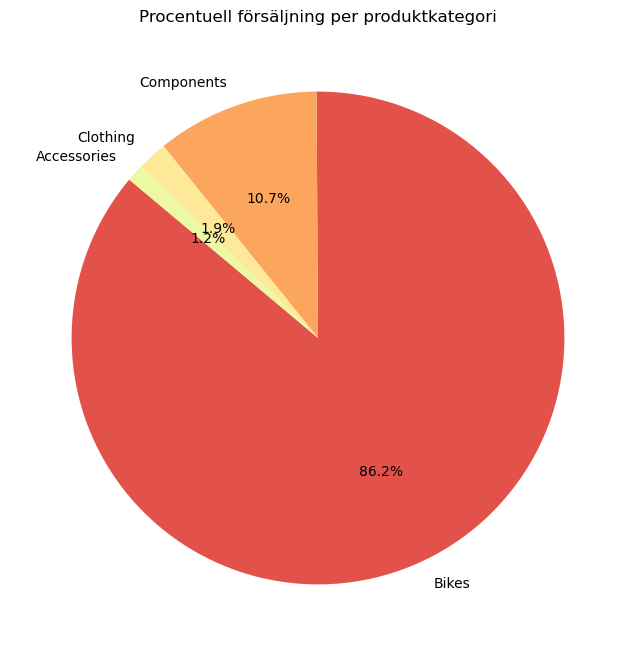

In [238]:
# Summerar total försäljning per kategori
sales_by_category = df_sales_order_detail.groupby('ProduktKategori')['TotalFörsäljning'].sum().reset_index()

# Sorterar efter total försäljning
sales_by_category = sales_by_category.sort_values(by='TotalFörsäljning', ascending=False)

# Visualiserar som cirkeldiagram
plt.figure(figsize=(8, 8))
plt.pie(
    sales_by_category['TotalFörsäljning'], 
    labels=sales_by_category['ProduktKategori'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('Spectral')[0:len(sales_by_category)]
)
plt.title('Procentuell försäljning per produktkategori')
plt.show()


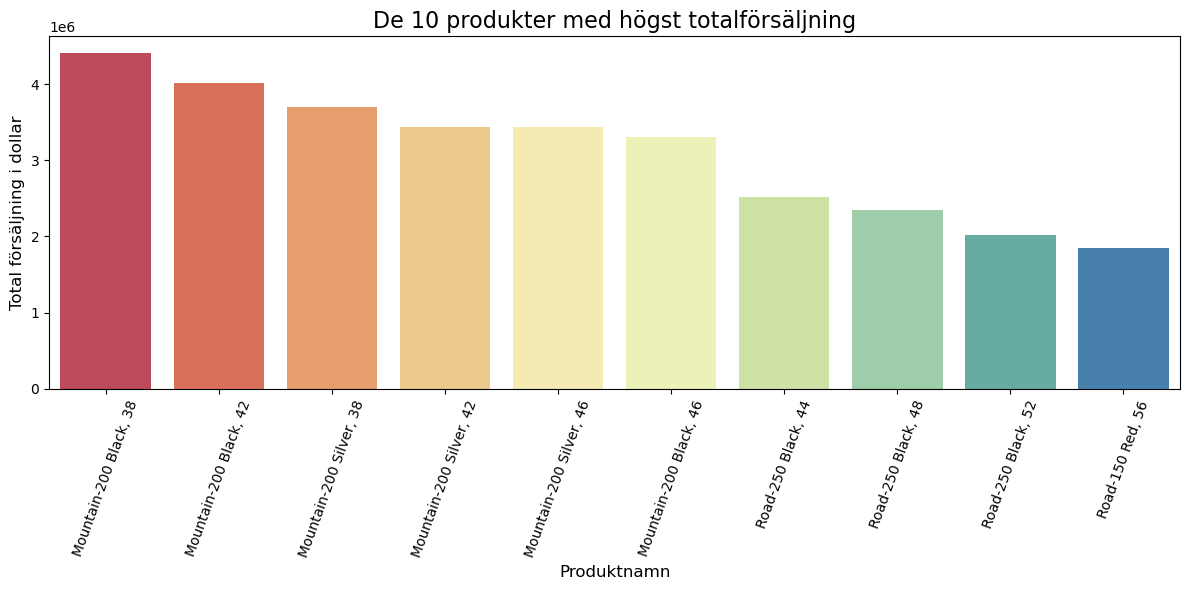

In [239]:
top_10_products = product_summary.sort_values(by='TotalFörsäljning', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='ProduktNamn', y='TotalFörsäljning', data=top_10_products, hue='ProduktNamn', dodge=False, palette='Spectral', legend=False)
plt.xticks(rotation=70, fontsize=10)
plt.xlabel('Produktnamn', fontsize=12)
plt.ylabel('Total försäljning i dollar', fontsize=12)
plt.title('De 10 produkter med högst totalförsäljning', fontsize=16)
plt.tight_layout()
plt.show()



In [240]:
# Query för flest antal sålda produkter
query_most_sales_order = """
SELECT 
    prod.Name AS ProduktNamn,
    SUM(sales.OrderQty) AS TotaltAntalSålda
FROM Sales.SalesOrderDetail sales
JOIN Production.Product prod ON sales.ProductID = prod.ProductID
GROUP BY sales.ProductID, prod.Name
ORDER BY TotaltAntalSålda DESC;
"""

df_most_sales_order = pd.read_sql(query_most_sales_order, engine)


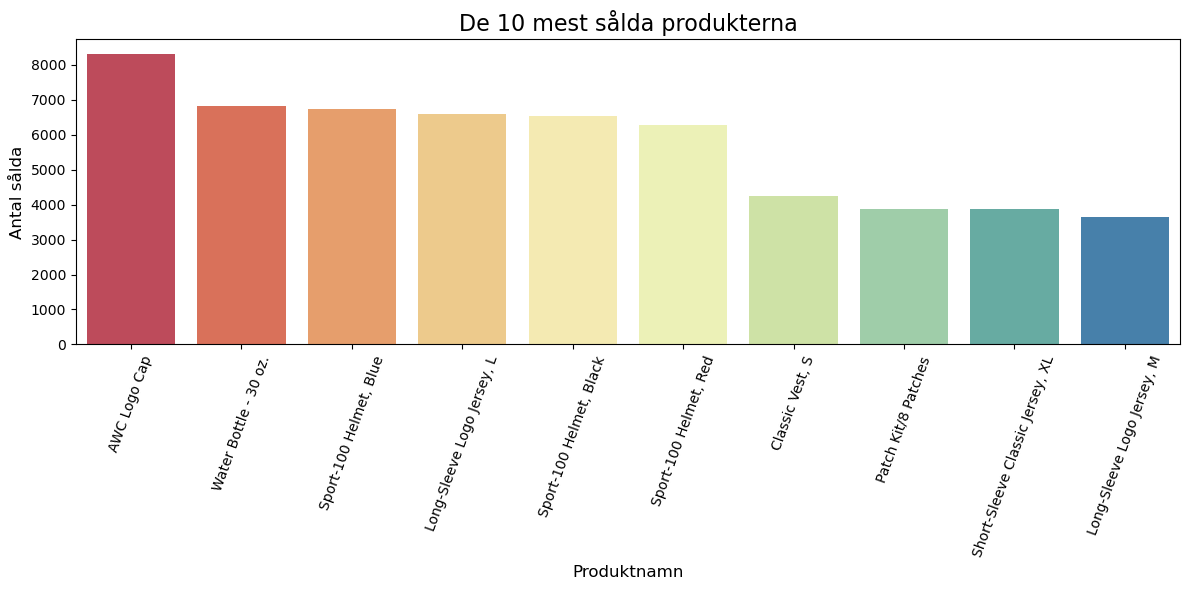

In [241]:

# Visualiserar SQL-frågan ovan och begränsar det till de 10 mest sålda produkterna i antal
plt.figure(figsize=(12, 6))
sns.barplot(
    x='ProduktNamn', y='TotaltAntalSålda', data=df_most_sales_order.head(10), hue='ProduktNamn', dodge=False, palette='Spectral', legend=False)
plt.xticks(rotation=70, fontsize=10)
plt.xlabel('Produktnamn', fontsize=12)
plt.ylabel('Antal sålda', fontsize=12)
plt.title('De 10 mest sålda produkterna', fontsize=16)
plt.tight_layout()
plt.show()


**Kort sammanfattning**  
En genomgång av ordervolymen visar att företaget fram till maj 2013 hade en jämn orderingång. Mellan maj och september 2013 ökade dock ordervolymen markant. Initiala data för 2014 tyder på en minskning i försäljningen, men det är svårt att dra slutsatser om framtiden baserat på denna information. Försöket att skapa en rullande 3-månadersöversikt resulterade i otydliga resultat på grund av den nedgång som observerades i slutet.  
Det är tydligt att den största försäljningskategorin är cyklar. Vilket man även ser om man tittar på de varor med högst totalförsäljning vilket blir tydligt både när man tittar på kategorin (cirkeldiagrammet) och enskilda varor med högst försäjning (tabellen). Däremot är det de mindre sakerna som det säljs mest av enligt undersökningen av försäljningsvolym.

**UPPGIFT 2**
I denna uppgift har jag valt att titta närmare på anställda på företaget. Har kort kollat hur många anställda de är och sedan fokuserat på sjukfrånvaro då det är ett område jag känner mig mer hemma inom. Dock är jag lite osäker på underlaget då jag tänkte att den data som finns kanske sträcker sig över flera år vilket jag dock insåg i efterhand. Men det fick bli så här ändå.

In [242]:
# SQL-fråga för att räkna antalet anställda per avdelning
department_employee_count_query = """
SELECT d.Name AS DepartmentName, COUNT(e.BusinessEntityID) AS EmployeeCount
FROM HumanResources.Employee e
JOIN HumanResources.EmployeeDepartmentHistory edh ON e.BusinessEntityID = edh.BusinessEntityID
JOIN HumanResources.Department d ON edh.DepartmentID = d.DepartmentID
GROUP BY d.Name;
"""

# Hämta data från databasen
df_department_employee_count = pd.read_sql(department_employee_count_query, engine)


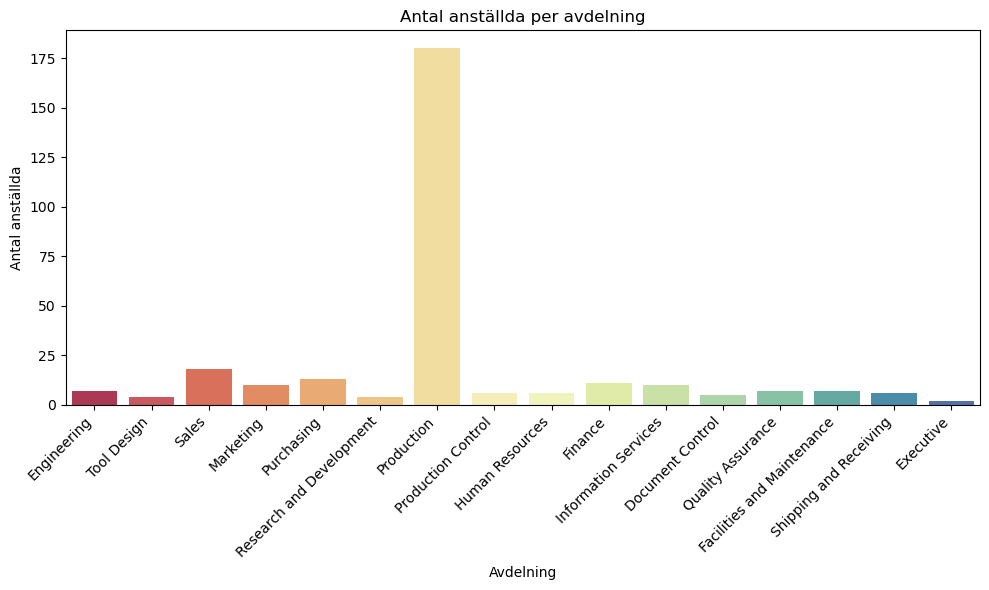

In [243]:
# Skapar ett stapeldiagram med seaborn med informationen från SQL-frågan ovan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_department_employee_count, x='DepartmentName', y='EmployeeCount', hue='DepartmentName', dodge=False, palette='Spectral', legend=False)
plt.xlabel('Avdelning')
plt.ylabel('Antal anställda')
plt.title('Antal anställda per avdelning')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [244]:
# SQL-fråga för att räkna antalet anställda
employee_count_query = """
SELECT COUNT(BusinessEntityID) AS EmployeeCount
FROM HumanResources.Employee;
"""

df_employee_count = pd.read_sql(employee_count_query, engine)
employee_count = df_employee_count.at[0, 'EmployeeCount']

print(f"AdventureWorks har {employee_count} anställda.")


AdventureWorks har 290 anställda.


Här kommer det tydligt fram att man har allra flest personer anställda inom just produktion. Jag har börjat analysera den sammanlagda sjukfrånvaron för att se om något sticker ut.

In [245]:
query_sick_leave = """SELECT 
    employee.BusinessEntityID, 
    employee.SickLeaveHours,
    employee.JobTitle,
    employee.Gender,
    dep.Name AS DepartmentName
FROM HumanResources.Employee employee
JOIN HumanResources.EmployeeDepartmentHistory edhistory
    ON employee.BusinessEntityID = edhistory.BusinessEntityID
JOIN HumanResources.Department dep
    ON edhistory.DepartmentID = dep.DepartmentID
WHERE edhistory.EndDate IS NULL ---Denna fick jag lägga till för att få rätt data och inte räkna med historiska data
ORDER BY employee.SickLeaveHours DESC;"""

df_sick_leave = pd.read_sql(query_sick_leave, engine)

df_sick_leave.head(5).style.hide(axis='index')


BusinessEntityID,SickLeaveHours,JobTitle,Gender,DepartmentName
4,80,Senior Tool Designer,M,Tool Design
1,69,Chief Executive Officer,M,Executive
88,69,Production Technician - WC10,F,Production
92,69,Production Technician - WC10,M,Production
116,69,Production Technician - WC50,M,Production


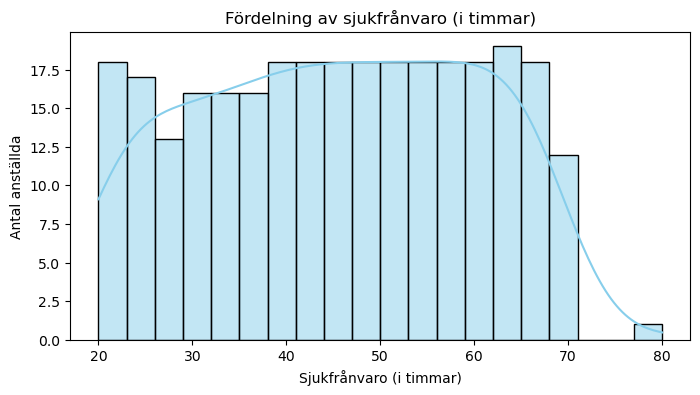

In [246]:
plt.figure(figsize=(8, 4))
sns.histplot(df_sick_leave['SickLeaveHours'], kde=True, bins=20, color='skyblue')
plt.title('Fördelning av sjukfrånvaro (i timmar)')
plt.xlabel('Sjukfrånvaro (i timmar)')
plt.ylabel('Antal anställda')
plt.show()


In [247]:
# Beräkna konfidensintervall för 'SickLeaveHours'
mean, h = compute_confidence_interval(df_sick_leave['SickLeaveHours'], confidence=0.95)

# Beräkna nedre och övre gränser
lower_bound = mean - h
upper_bound = mean + h

# Skriv ut resultatet
print(f"Genomsnittlig sjukfrånvaro per anställd: {mean:.2f} timmar")
print(f"Antal observationer: {len(df_sick_leave)}")
print(f"95% Konfidensintervall: ({lower_bound:.2f}, {upper_bound:.2f}) timmar")


Genomsnittlig sjukfrånvaro per anställd: 45.31 timmar
Antal observationer: 290
95% Konfidensintervall: (43.63, 46.99) timmar


In [248]:
# Gruppindelning per kön för att beräkna genomsnittlig sjukfrånvaro
sick_leave_by_gender = df_sick_leave.groupby('Gender')['SickLeaveHours'].mean().reset_index()
sick_leave_by_gender.style.hide(axis='index')

Gender,SickLeaveHours
F,45.761905
M,45.121359


Jag testade att analysera om det fanns någon skillnad mellan könen men kunde inte se att det skulle vara så mycket att titta vidare på. Istället går jag vidare och kollar på skillnaden mellan de olika avdelningarna istället.

In [249]:
# Gruppindelning per avdelning för att räkna genomsnittlig sjukfrånvaro och antalet anställda
sick_leave_by_dep = (
    df_sick_leave.groupby(['DepartmentName'])
    .agg(
        AvgSickLeaveHours=('SickLeaveHours', 'mean'),
        EmployeeCount=('SickLeaveHours', 'size') 
    )
    .reset_index()
)

# Sortera efter genomsnittlig sjukfrånvaro
sick_leave_by_dep_sorted = sick_leave_by_dep.sort_values(by='AvgSickLeaveHours', ascending=False)

# Visa DataFrame utan index och sortera efter genomsnittlig sjukfrånvaro i fallande ordning
sick_leave_by_dep_sorted.style.hide(axis='index')


DepartmentName,AvgSickLeaveHours,EmployeeCount
Shipping and Receiving,67.500000,6
Facilities and Maintenance,64.285714,7
Quality Assurance,61.000000,6
Document Control,58.200000,5
Information Services,54.500000,10
Research and Development,54.000000,4
Finance,49.500000,10
Purchasing,47.000000,12
Human Resources,45.500000,6
Executive,44.500000,2


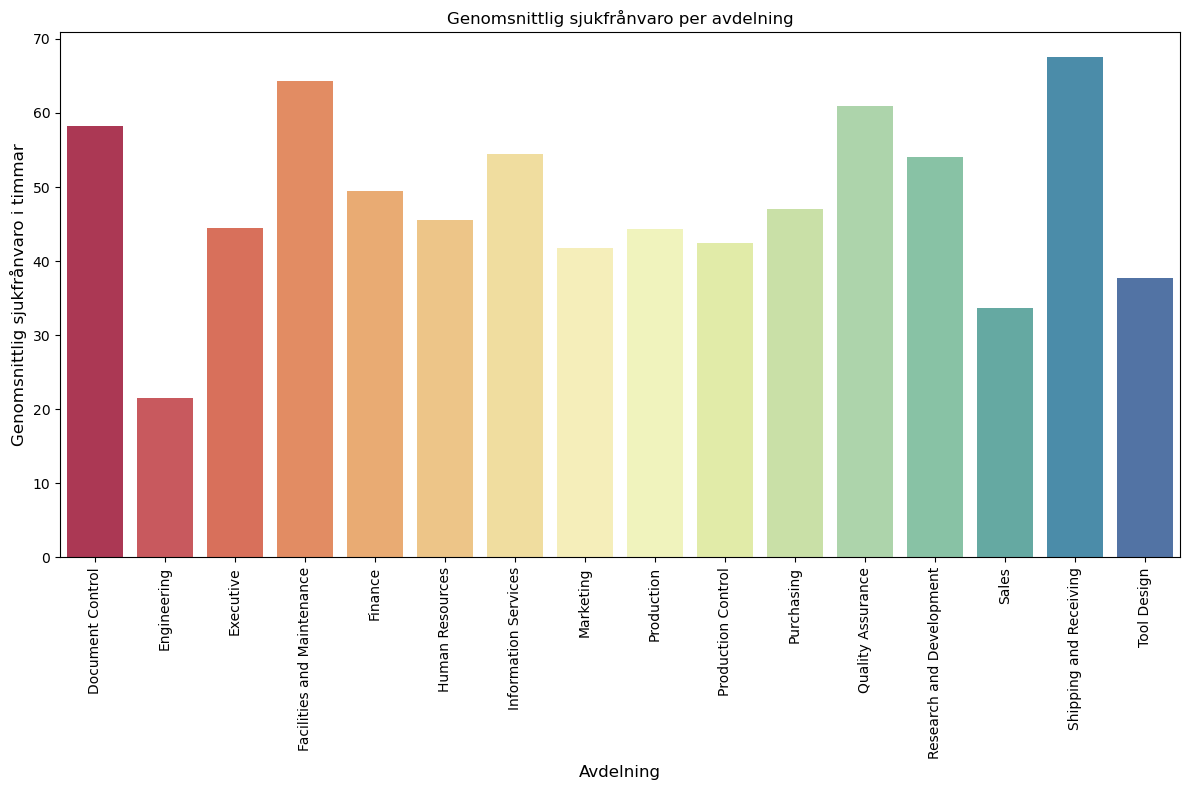

In [250]:
# Skapa stapeldiagram
plt.figure(figsize=(12, 8))
sns.barplot(
    data=sick_leave_by_dep, x='DepartmentName',y='AvgSickLeaveHours', hue='DepartmentName', dodge=False, palette='Spectral', legend=False)

plt.title('Genomsnittlig sjukfrånvaro per avdelning')
plt.xlabel('Avdelning', fontsize=12)
plt.ylabel('Genomsnittlig sjukfrånvaro i timmar', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


Här framkommer att Shipping and Receiving, Facilities and Maintenance, Quality Assurance, Document Control, Information Services och Research and Developmentligger ganska högt över genomsnittlig sjukfrånvaro per anställd, vilket är 45.31 timmar. Som vi tidigare sett är de flest anställda dock inom Production. Valde att gå vidare inom produktionen då det arbetar flest här på företaget vilket gör att det finns mer data att hämta och analysera.

In [251]:
query_production = """
SELECT 
    employee.SickLeaveHours, 
    employee.JobTitle, 
    employee.Gender, 
    dep.Name AS DepartmentName
FROM HumanResources.Employee employee
JOIN HumanResources.EmployeeDepartmentHistory edhistory
    ON employee.BusinessEntityID = edhistory.BusinessEntityID
JOIN HumanResources.Department dep
    ON edhistory.DepartmentID = dep.DepartmentID
WHERE dep.Name = 'Production'
ORDER BY employee.SickLeaveHours DESC;
"""

df_production = pd.read_sql(query_production, engine)
df_production.head(5).style.hide(axis='index')

SickLeaveHours,JobTitle,Gender,DepartmentName
69,Production Technician - WC10,F,Production
69,Production Technician - WC10,M,Production
69,Production Technician - WC50,M,Production
69,Production Technician - WC50,M,Production
68,Production Technician - WC50,F,Production


In [252]:
# Beräkna konfidensintervall för 'SickLeaveHours' i produktionen
mean_production, h_production = compute_confidence_interval(df_production['SickLeaveHours'], confidence=0.95)

lower_bound_production = mean_production - h_production
upper_bound_production = mean_production + h_production

print(f"Genomsnittlig sjukfrånvaro per anställd i produktionen: {mean_production:.2f} timmar")
print(f"Antal observationer: {len(df_production)}")
print(f"95% Konfidensintervall: ({lower_bound_production:.2f}, {upper_bound_production:.2f}) timmar")

Genomsnittlig sjukfrånvaro per anställd i produktionen: 44.28 timmar
Antal observationer: 180
95% Konfidensintervall: (42.05, 46.52) timmar


In [253]:
# Gruppindelning och beräkning
sick_leave_by_title = df_production.groupby('JobTitle')['SickLeaveHours'].agg(['mean', 'count']).reset_index()
sick_leave_by_title = sick_leave_by_title.sort_values(by='mean', ascending=False)
sick_leave_by_title.columns = ['JobTitle', 'AvgSickLeaveHours', 'EmployeeCount']
sick_leave_by_title.style.hide(axis='index')

JobTitle,AvgSickLeaveHours,EmployeeCount
Production Technician - WC10,65.235294,17
Production Supervisor - WC60,60.333333,3
Production Technician - WC45,59.733333,15
Production Supervisor - WC50,58.666667,3
Production Supervisor - WC45,57.333333,3
Production Supervisor - WC40,55.666667,3
Production Supervisor - WC30,54.333333,3
Production Supervisor - WC10,52.666667,3
Vice President of Production,52.000000,1
Production Technician - WC40,49.500000,26


In [254]:
# Gruppindelning och konfidensintervallberäkning
confidence_results_production = []
for job_title, group in df_production.groupby('JobTitle'):
    if len(group) > 1:  # Kontrollerar att gruppen innehåller minst två observationer
        mean, h = compute_confidence_interval(group['SickLeaveHours'], confidence=0.95)
    else:
        mean, h = group['SickLeaveHours'].mean(), 0  # Om gruppen har färre än två observationer
    confidence_results_production.append({
        'JobTitle': job_title,
        'AvgSickLeaveHours': mean,
        'CI_High': mean + h,
        'CI_Low': mean - h,
        'EmployeeCount': len(group)
    })

sick_leave_with_ci = pd.DataFrame(confidence_results_production).sort_values(by='AvgSickLeaveHours', ascending=False)


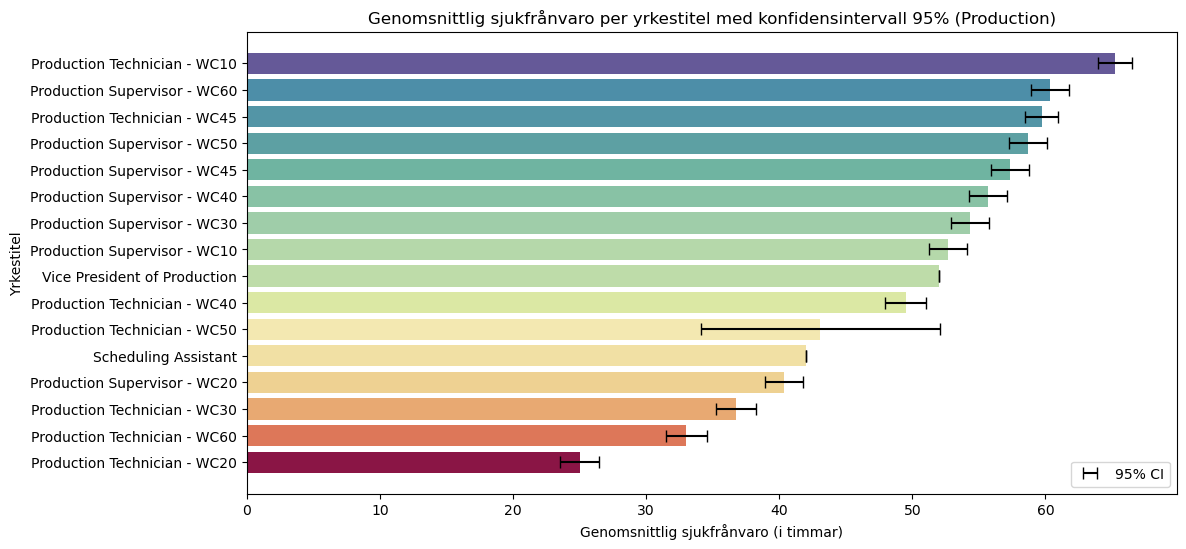

In [255]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sick_leave_with_ci, x='AvgSickLeaveHours', y='JobTitle', hue='AvgSickLeaveHours', dodge=False, palette='Spectral', legend=False)

# Lägg till felstaplar till stapeldiagrammet
plt.errorbar(
    x=sick_leave_with_ci['AvgSickLeaveHours'], 
    y=range(len(sick_leave_with_ci)),
    xerr=(sick_leave_with_ci['CI_High'] - sick_leave_with_ci['AvgSickLeaveHours']).values,
    fmt='none', 
    c='black', 
    capsize=4, 
    label='95% CI'
)

# Anpassa layout
plt.title('Genomsnittlig sjukfrånvaro per yrkestitel med konfidensintervall 95% (Production)')
plt.xlabel('Genomsnittlig sjukfrånvaro (i timmar)')
plt.ylabel('Yrkestitel')
plt.legend()
plt.show()

Uppmärksammar här att det är stora sillnader mellan Production Technicians och valde att gå vidare för att analysera detta me då de är en relaitvt stor grupp av anställda på företaget och kan vara bra att få en djupare analys.

In [256]:
# Filtrera DataFrame för att endast inkludera Production Technician
df_production_technician = df_production[df_production['JobTitle'].str.contains('Production Technician')]

# Gruppindelning per JobTitle för att beräkna genomsnittlig sjukfrånvaro och antal anställda
sick_leave_by_tech = (
    df_production_technician.groupby('JobTitle')
    .agg(
        AvgSickLeaveHours=('SickLeaveHours', 'mean'),
        StdDevSickLeaveHours=('SickLeaveHours', 'std'),
        EmployeeCount=('SickLeaveHours', 'size')
    )
    .reset_index()
)

# Beräkna konfidensintervall för varje jobbtitel
confidence = 0.95
sick_leave_by_tech['h'] = sick_leave_by_tech['StdDevSickLeaveHours'] / np.sqrt(sick_leave_by_tech['EmployeeCount']) * stats.t.ppf((1 + confidence) / 2., sick_leave_by_tech['EmployeeCount']-1)
sick_leave_by_tech['CI_lower'] = sick_leave_by_tech['AvgSickLeaveHours'] - sick_leave_by_tech['h']
sick_leave_by_tech['CI_upper'] = sick_leave_by_tech['AvgSickLeaveHours'] + sick_leave_by_tech['h']



In [257]:
# Gruppindelning per JobTitle för att beräkna genomsnittlig sjukfrånvaro och antal anställda
sick_leave_by_tech = (
    df_production_technician.groupby('JobTitle')
    .agg(
        EmployeeCount=('SickLeaveHours', 'size')
    )
    .reset_index()
)

# Beräkna konfidensintervall för varje jobbtitel och lägg till dessa i DataFrame
confidence = 0.95
means = []
h_values = []
lower_bounds = []
upper_bounds = []

for job_title in sick_leave_by_tech['JobTitle']:
    data = df_production_technician[df_production_technician['JobTitle'] == job_title]['SickLeaveHours']
    mean, h = compute_confidence_interval(data, confidence)
    means.append(mean)
    h_values.append(h)
    lower_bounds.append(mean - h)
    upper_bounds.append(mean + h)

sick_leave_by_tech['AvgSickLeaveHours'] = means
sick_leave_by_tech['h'] = h_values
sick_leave_by_tech['CI_lower'] = lower_bounds
sick_leave_by_tech['CI_upper'] = upper_bounds
sick_leave_by_tech

,JobTitle,EmployeeCount,AvgSickLeaveHours,h,CI_lower,CI_upper
0,Production Technician - WC10,17,65.235294,1.304892,63.930402,66.540186
1,Production Technician - WC20,22,25.000000,1.435070,23.564930,26.435070
2,Production Technician - WC30,25,36.760000,1.522629,35.237371,38.282629
3,Production Technician - WC40,26,49.500000,1.554918,47.945082,51.054918
4,Production Technician - WC45,15,59.733333,1.246521,58.486812,60.979854
5,Production Technician - WC50,26,43.076923,8.965626,34.111297,52.042549
6,Production Technician - WC60,26,33.000000,1.541218,31.458782,34.541218


In [258]:
# Filtrerar min dataframe för att endast inkludera Production Technician
df_production_technician = df_production[df_production['JobTitle'].str.contains('Production Technician')]

# Gruppindelning per JobTitle för att beräkna genomsnittlig sjukfrånvaro och antal anställda
sick_leave_by_tech = (
    df_production_technician.groupby('JobTitle')
    .agg(
        EmployeeCount=('SickLeaveHours', 'size')
    )
    .reset_index())

# Beräknar konfidensintervall för varje jobbtitel
confidence = 0.95
means = []
h_values = []
lower_bounds = []
upper_bounds = []

for job_title in sick_leave_by_tech['JobTitle']:
    data = df_production_technician[df_production_technician['JobTitle'] == job_title]['SickLeaveHours']
    mean, h = compute_confidence_interval(data, confidence)
    means.append(mean)
    h_values.append(h)
    lower_bounds.append(mean - h)
    upper_bounds.append(mean + h)

sick_leave_by_tech['AvgSickLeaveHours'] = means
sick_leave_by_tech['h'] = h_values
sick_leave_by_tech['CI_lower'] = lower_bounds
sick_leave_by_tech['CI_upper'] = upper_bounds

sick_leave_by_tech

,JobTitle,EmployeeCount,AvgSickLeaveHours,h,CI_lower,CI_upper
0,Production Technician - WC10,17,65.235294,1.304892,63.930402,66.540186
1,Production Technician - WC20,22,25.000000,1.435070,23.564930,26.435070
2,Production Technician - WC30,25,36.760000,1.522629,35.237371,38.282629
3,Production Technician - WC40,26,49.500000,1.554918,47.945082,51.054918
4,Production Technician - WC45,15,59.733333,1.246521,58.486812,60.979854
5,Production Technician - WC50,26,43.076923,8.965626,34.111297,52.042549
6,Production Technician - WC60,26,33.000000,1.541218,31.458782,34.541218


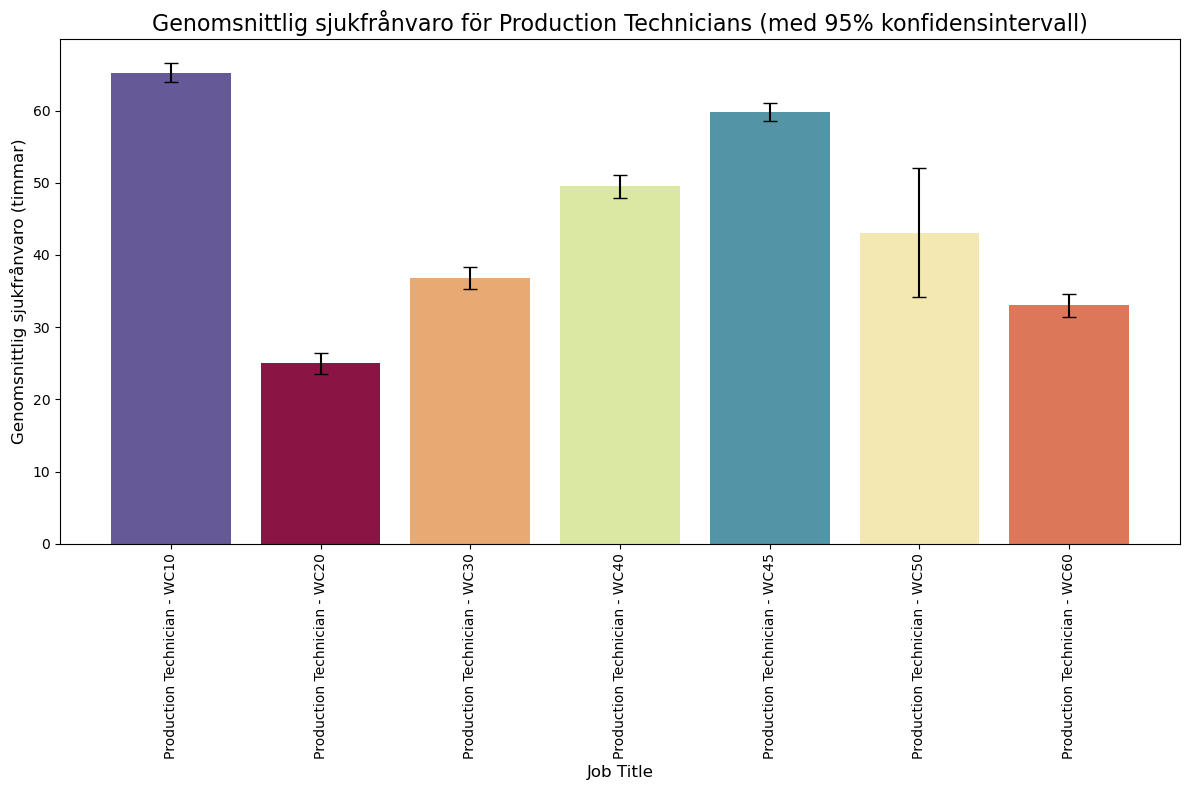

In [259]:
plt.figure(figsize=(12, 8))
sns.barplot(data=sick_leave_by_tech, x='JobTitle', y='AvgSickLeaveHours', hue='AvgSickLeaveHours', dodge=False, palette='Spectral', legend=False)

plt.errorbar(
    x=range(len(sick_leave_by_tech)),
    y=sick_leave_by_tech['AvgSickLeaveHours'],
    yerr=[sick_leave_by_tech['AvgSickLeaveHours'] - sick_leave_by_tech['CI_lower'], 
          sick_leave_by_tech['CI_upper'] - sick_leave_by_tech['AvgSickLeaveHours']],
    fmt='none', 
    capsize=5, 
    color='black',
    linewidth=1.5
)

plt.title('Genomsnittlig sjukfrånvaro för Production Technicians (med 95% konfidensintervall)', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Genomsnittlig sjukfrånvaro (timmar)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**SAMMANFATTANDE ANALYS SJUKFRÅNVARO**

På företaget arbetar 290 personer varav den största delen inom avdelningen Production. 

Genomsnittlig sjukfrånvaro per anställd är 45,31 timmar baserat på 290 observationer. Det uppskattade 95% konfidensintervallet ligger mellan 43,63 och 46,99 timmar. Detta innebär att vi med 95% säkerhet kan säga att det sanna genomsnittet för sjukfrånvaron per anställd ligger inom detta intervall. De flesta avdelningar ligger i närheten av detta genomsnitt, men det finns några tydliga avvikelser.

Shipping and Receiving har den högsta genomsnittliga sjukfrånvaron med 67,5 timmar per anställd. Andra avdelningar med hög sjukfrånvaro inkluderar Facilities and Maintenance (64,3 timmar) och Quality Assurance (61 timmar). Om vi tittar på den lägsta genomsnittliga sjukfrånvaron hittar vi istället Engineering som har en genomsnittlig sjukfrånvaro på bara 21,5 timmar per anställd. 

Produktionsavdelningen, som är den största med 179 anställda, har en genomsnittlig sjukfrånvaro på 44,3 timmar vilket ligger i linje med den genomsnittliga sjukfrånvaron. Det uppskattade 95% konfidensintervallet för sjukfrånvaron ligger mellan 42,05 och 46,52 timmar för produktionsavdelningen.

I en detaljerad analys av sjukfrånvaron i produktionsavdelningen kan vi se att sjukfrånvaron varierar beroende på vilken yrkestitel man har. Production technician i WC10 har den högsta genomsnittliga sjukfrånvaron med 65,24 timmar per anställd, följt av Production Supervisor - WC60 med 60,33 timmar. Generellt sett har Production Supervisors högre genomsnittlig sjukfrånvaro jämfört med andra roller, med sjukfrånvaro varierande mellan 40,33 och 60,33 timmar beroende på var man arbetar. Lägre nivåer av sjukfrånvaro ses i roller som Production Technician - WC20 med endast ett genomsnitt på 25 timmar per anställd. 

Däremot ser man att 179 anställda inom produktion är 159 stycken av yrkesrollen Production technician. Detta gör att det inte finns så stort underlag att titta på gällande de övriga som sticker iväg i sjukfrånvaro.

Då man ser att det även är stor skillnad inom just yrkestiteln Production technician så har en ytterligare analys gjorts av dem och där framkommer det att det finns en ganska stor skillnad i sjukfrånvaro. Som tidigare nämnts har WC20 lägst sjukfrånvaro medan WC45 och WC10 har betydligt högre frånvaro med ett genomsnitt på 65 respektive 59 sjukfrånvarotimmar per anställd.


**EXECUTIVE SUMMARY**  
På företaget arbetar 290 personer, med en genomsnittlig sjukfrånvaro på 45,31 timmar per anställd. Shipping and Receiving har högst sjukfrånvaro (67,5 timmar), medan Engineering har lägst (21,5 timmar). Produktionsavdelningen, som har 179 anställda, har en något lägre genomsnittlig sjukfrånvaro på 44,3 timmar. Inom produktionen varierar sjukfrånvaron beroende på jobbtitel, där arbetsområdena WC10 och WC45 har den högsta genomsnittliga sjukfrånvaron (ca 65 timmar) och WC20 har den lägsta (25 timmar).

Sammantaget bör en djupare analys kring de olika avdelningarna som har mycket hög frånvaro och vad det kan bero på. En rekommendation är också att djupare analysera vad som skiljer de olika arbetsområdena åt gällande Production technician då spridningen är stor inom denna yrkesroll. Kanske finns det goda exempel på hur man lyckas hålla ner sjukfrånvaron att ta del av.


**Datum för muntlig presentation**
- Inspelat format 2025-01-05

**SJÄLVUTVÄRDERING**

**1. Utmaningar**
- Egentligen har den stora utmaningen tyvärr varit att få till tiden att studera så mycket som jag velat. Har haft svårigheter att balansera min ambitionsnivå och den tid jag har haft möjlighet att lägga på studierna med anledning av hemsituationen just nu, finns även risk att den håller i sig under vårterminen också så balans måste hittas här framöver. Sen har det varit en stor utmaning att förstå hur jag ska analysera datan och dra slutsatser, själva framtagandet och lekande med koden har varit lättare men jag känner mig väldigt osäker på hur jag ska tänka när jag ska analysera framförallt affärsdata, har gjort många försök (kanske för många) med olika koder men valde att visa det som presenteras ovan för att jag inte riktigt fick ihop heltheten trots många försöka.

**2. Vilket betyg?**
- Tänker ett G då jag inte lyckats gå så djupt i min analyser och dra slutsatser.  

**3. Tips till dig själv**
- Som tidigare, fastna inte utan gå vidare och gå tillbaka istället och inse att man inte kan lära sig ALLT. Dock blivit något bättre denna kurs så hoppas på bra fortsättning med det. Önskar även att jag inte hade fokuserat så mycket på att försöka lära mig allt utan jobbat mer aktivit med kunskapskontrollen under längre tid då man lärt sig väldigt mycket under arbetet med den. Samt rådet att inte vara för hård mot mig själv.